### The Power of Transfer Learning

Importing a random image

In [1]:
from tensorflow.keras.preprocessing import image
import numpy as np

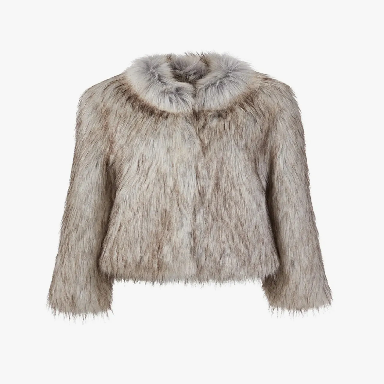

In [2]:
img = image.load_img("Furcoat.webp",target_size=(384, 384))
img

### Using a ready made model from Keras applications

In [3]:
from keras.applications.efficientnet_v2 import EfficientNetV2S, decode_predictions
model = EfficientNetV2S(weights='imagenet')

87549136/87549136 [==============================] - 0s 0us/step


In [4]:
# Reformatting image for working with Keras model
img_array = image.img_to_array(img)
img_array = img_array.reshape((1, 384, 384, 3))
pred = model.predict(img_array)
decode_predictions(pred)

35363/35363 [==============================] - 0s 0us/step


[[('n03404251', 'fur_coat', 0.9117289),
  ('n03045698', 'cloak', 0.002375168),
  ('n04325704', 'stole', 0.001371511),
  ('n02817516', 'bearskin', 0.0010477895),
  ('n04479046', 'trench_coat', 0.0007667327)]]

## Anatomy of an image

In [5]:
import cv2
from google.colab.patches import cv2_imshow

In [6]:
pie = cv2.imread("RGB.png")
pie.shape

(316, 314, 3)

In [7]:
pie.size

297672

In [8]:
pie.size/3 == 316*314

True

In [9]:
pie[:,:,0].shape

(316, 314)

In [10]:
b, g, r = cv2.split(pie)

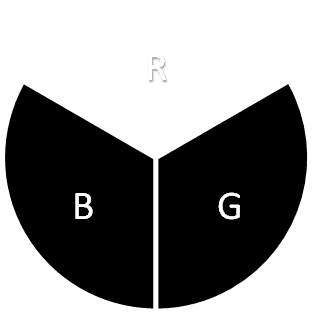

In [11]:
cv2_imshow(r)

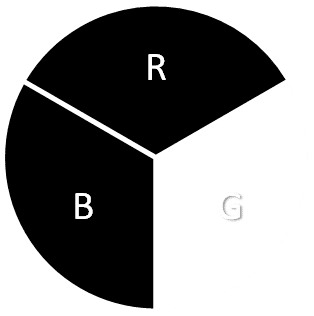

In [12]:
cv2_imshow(g)

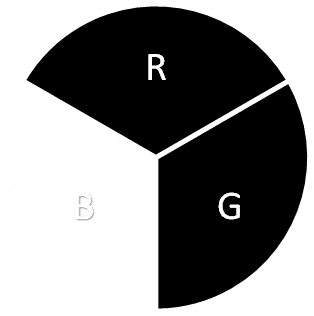

In [ ]:
cv2_imshow(b)

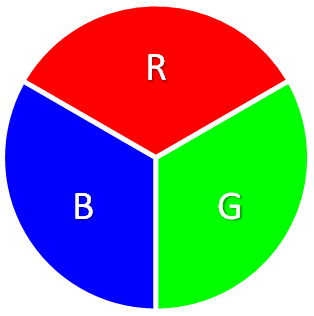

In [13]:
pie_merged = cv2.merge((b, g, r))
cv2_imshow(pie_merged)

## Basic image manipulation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os, random
import cv2

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
coat = cv2.imread("Furcoat.webp")
coat.shape

(1707, 1280, 3)

#### Resize

In [ ]:
ht_new = 500; wt_new =500
coat_new = cv2.resize(coat, (ht_new, wt_new))
coat_new.shape

(500, 500, 3)

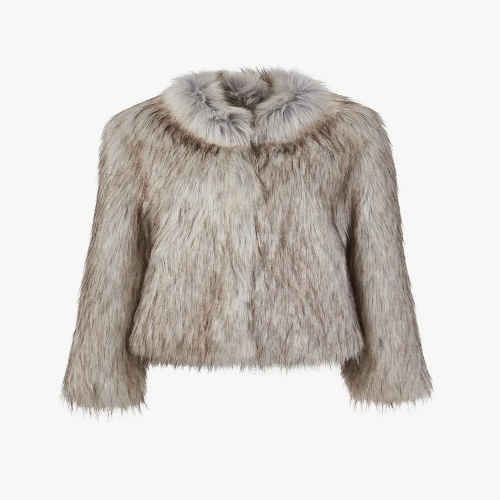

In [ ]:
cv2_imshow(coat_new)

#### Normalize

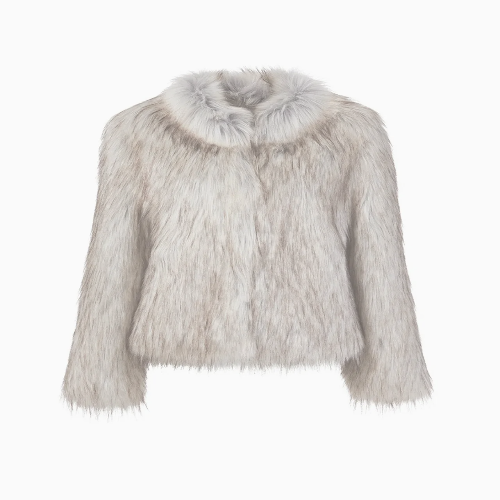

In [ ]:
coat_norm = cv2.normalize(coat_new, None, 100, 255, cv2.NORM_MINMAX)
cv2_imshow(coat_norm)

#### Blur image

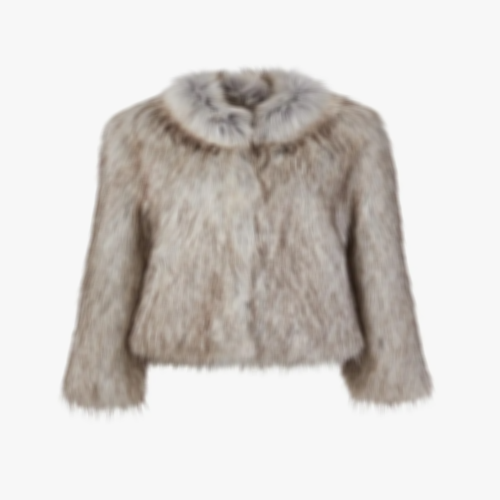

In [ ]:
blur_kernel = np.ones((5, 5), np.float32) / 25
coat_blur = cv2.filter2D(src=coat_new, ddepth=0, kernel=blur_kernel)
cv2_imshow(coat_blur)

More examples:  https://medium.com/@nimritakoul01/image-processing-using-opencv-python-9c9b83f4b1ca  

Official CV2 tutorial: https://docs.opencv.org/4.x/d2/d96/tutorial_py_table_of_contents_imgproc.html  

## Exploring data for our case study

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
fpath = '/content/drive/MyDrive/workshop/Traffic Signs.zip'
with zipfile.ZipFile(fpath, 'r') as zip_ref:
  zip_ref.extractall()

In [ ]:
train_dir = "./traffic_Data/DATA/"
test_dir = "./traffic_Data/TEST/"
labels = pd.read_csv("labels.csv")

In [ ]:
labels.shape

(58, 2)

In [ ]:
labels.head()

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


In [ ]:
labels['Name'] = labels.Name.str.lower()
labels.index = labels.ClassId
labels.head()

,ClassId,Name
ClassId,,
0,0,speed limit (5km/h)
1,1,speed limit (15km/h)
2,2,speed limit (30km/h)
3,3,speed limit (40km/h)
4,4,speed limit (50km/h)


(131, 131, 3)


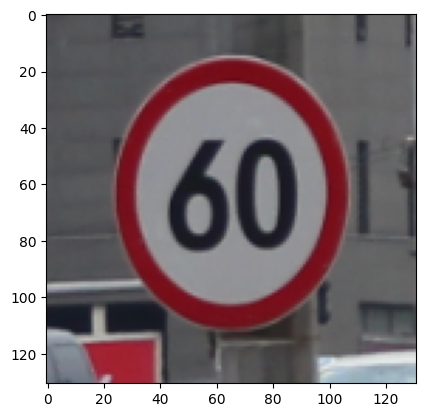

In [ ]:
img_path=train_dir+'/5/005_0001.png'
img=plt.imread(img_path)
print(img.shape)
plt.imshow(img)
plt.show()

#### Creating datasets from the images

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
img_dim = 128
train_ds_gen = image_dataset_from_directory(
                  train_dir,
                  image_size = (img_dim, img_dim),
                  batch_size=32,
                  seed = 42,
                  shuffle=True,
                  validation_split=0.2,
                  subset='training'
)

val_ds_gen = image_dataset_from_directory(
                  train_dir,
                  image_size = (img_dim, img_dim),
                  batch_size=32,
                  seed = 42,
                  shuffle=True,
                  validation_split=0.2,
                  subset='validation'
)

Found 4170 files belonging to 58 classes.
Using 3336 files for training.
Found 4170 files belonging to 58 classes.
Using 834 files for validation.


In [ ]:
train_ds_gen.file_paths[:5]

['./traffic_Data/DATA/3/003_1_0001.png',
 './traffic_Data/DATA/54/054_0107.png',
 './traffic_Data/DATA/3/003_0106.png',
 './traffic_Data/DATA/29/029_0009.png',
 './traffic_Data/DATA/6/006_1_0002.png']

In [ ]:
labels_raw = pd.Series([pth.split('/')[3] for pth in train_ds_gen.file_paths])
label_counts = labels_raw.value_counts()
label_counts.index = label_counts.index.astype(int)

In [ ]:
label_counts.head()

,count
28,352
54,258
3,216
5,151
55,135


In [ ]:
label_name_counts = pd.concat([labels, label_counts],axis=1)
label_name_counts

,ClassId,Name,count
0,0,speed limit (5km/h),97
1,1,speed limit (15km/h),31
2,2,speed limit (30km/h),62
3,3,speed limit (40km/h),216
4,4,speed limit (50km/h),81
5,5,speed limit (60km/h),151
6,6,speed limit (70km/h),62
7,7,speed limit (80km/h),119
8,8,dont go straight or left,5
9,9,dont go straight or right,2


#### Let's see what 56 is

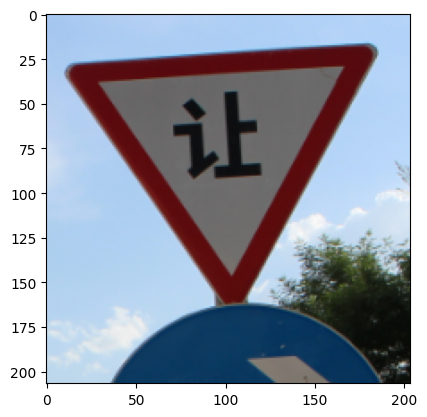

In [ ]:
img_path=train_dir+'/56/056_0011.png'
img=plt.imread(img_path)
plt.imshow(img)
plt.show()

The meaning of the [sign](https://pixels.com/featured/chinese-yield-sign-elisabeth-lucas.html).  
Let's rename the label to the true meaning.

In [ ]:
labels.loc[56,'Name'] = 'yield'
labels.tail()

,ClassId,Name
ClassId,,
53,53,give way
54,54,no stopping
55,55,no entry
56,56,yield
57,57,unknown8


## Fine tune a State Of The Art model

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
num_classes = len(labels)
num_classes

img_dim = 224
train_ds_gen = image_dataset_from_directory(
                  train_dir,
                  image_size = (img_dim, img_dim),
                  batch_size=32,
                  seed = 42,
                  shuffle=True,
                  validation_split=0.2,
                  subset='training'
)

val_ds_gen = image_dataset_from_directory(
                  train_dir,
                  image_size = (img_dim, img_dim),
                  batch_size=32,
                  seed = 42,
                  shuffle=True,
                  validation_split=0.2,
                  subset='validation'
)

Found 4170 files belonging to 58 classes.
Using 3336 files for training.
Found 4170 files belonging to 58 classes.
Using 834 files for validation.


#### Various approaches to fine-tuning  
1. Freeze all layers, add and train only a head layer
2. Train top few layers
3. Train all layers (with very low learning rate)

In [ ]:
from keras.applications.efficientnet import EfficientNetB5
model_base = EfficientNetB5(weights='imagenet',
                          include_top=False,
                          pooling='avg')

In [ ]:
model_base.trainable = False

In [ ]:
model_base.trainable = True
for layer in model_base.layers[:-5]:
  layer.trainable = False

### Defining our model (SOTA + training layer)

In [ ]:
from keras.applications.efficientnet import EfficientNetB5, decode_predictions

model_base = EfficientNetB5(weights='imagenet',
                          include_top=False,
                          pooling='avg',
                          input_shape=(224,224,3))
model_base.trainable = False

In [ ]:
model_upd = Sequential()
model_upd.add(model_base)
model_upd.add(Dense(128,activation='relu'))
model_upd.add(Dense(num_classes, activation='softmax'))
model_upd.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb5 (Functional  (None, 2048)              28513527  
 )                                                               
                                                                 
 dense_9 (Dense)             (None, 128)               262272    
                                                                 
 dense_10 (Dense)            (None, 58)                7482      
                                                                 
Total params: 28783281 (109.80 MB)
Trainable params: 269754 (1.03 MB)
Non-trainable params: 28513527 (108.77 MB)
_________________________________________________________________


In [ ]:
model_upd.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
# When retraining all weights, use a very small learning rate and use few epochs
# from keras.optimizers import Adam
# optimizer = Adam(learning_rate=3e-5)
# model_upd.compile(loss='sparse_categorical_crossentropy',
#                   optimizer=optimizer,
#                   metrics=['accuracy'])

In [ ]:
callback = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

In [ ]:
epochs=2
history = model_upd.fit(train_ds_gen,
                        validation_data=val_ds_gen,
                        epochs=epochs,
                        callbacks=[callback],
                        validation_steps = 1
)

Epoch 1/2
105/105 [==============================] - 145s 1s/step - loss: 1.6588 - accuracy: 0.6184 - val_loss: 0.7124 - val_accuracy: 0.8125
Epoch 2/2
105/105 [==============================] - 127s 1s/step - loss: 0.5271 - accuracy: 0.8849 - val_loss: 0.4029 - val_accuracy: 0.8750


## Create your Image classification App

In [ ]:
!pip install gradio --quiet

In [ ]:
import gradio as gr
from PIL import Image
from keras.preprocessing.image import img_to_array

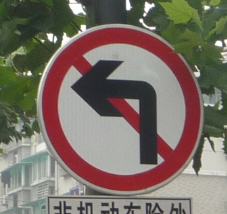

In [ ]:
img_path=train_dir+'/11/011_1_0014.png'
img = Image.open(img_path)
img

In [ ]:
labels.index = labels.index.astype(str)
labels.sort_index(inplace=True)
labels.reset_index(drop=True, inplace=True)
labels.head()

,ClassId,Name
0,0,speed limit (5km/h)
1,1,speed limit (15km/h)
2,10,dont go straight
3,11,dont go left
4,12,dont go left or right


In [ ]:
#img = img.resize((128,128))
img = img.resize((224,224))
img_array = img_to_array(img)
#img_array = img_array.reshape((1, 128, 128, 3))
img_array = img_array.reshape((1, 224, 224, 3))
prediction = model_upd.predict(img_array, verbose=0).flatten()

pred_list =  {labels['Name'][i]: float(prediction[i]) for i in range(num_classes)}
pred_list

{'speed limit (5km/h)': 0.0012895079562440515,
 'speed limit (15km/h)': 0.0030250323470681906,
 'dont go straight': 0.08094009011983871,
 'dont go left': 0.3149687647819519,
 'dont go left or right': 0.026413049548864365,
 'dont go right': 0.17331933975219727,
 'dont overtake from left': 0.009603224694728851,
 'no uturn': 0.035549066960811615,
 'no car': 0.0019043856300413609,
 'no horn': 0.005709861870855093,
 'speed limit (40km/h)': 0.04114018380641937,
 'speed limit (50km/h)': 0.00070664327358827,
 'speed limit (30km/h)': 0.00013371261593420058,
 'go straight or right': 0.031048577278852463,
 'go straight': 0.009798544459044933,
 'go left': 0.003803428029641509,
 'go left or right': 0.001728251576423645,
 'go right': 0.13582365214824677,
 'keep left': 7.997079228516668e-05,
 'keep right': 0.01620902121067047,
 'roundabout mandatory': 0.004442491568624973,
 'watch out for cars': 0.00028042541816830635,
 'horn': 0.0007849409012123942,
 'bicycles crossing': 0.0002088686014758423,
 'utu

In [ ]:
labels['Name'][prediction.argmax()]

'dont go left'

In [ ]:
#defining function to return predictions that we will use with Gradio
def classify_image(inp):
  img = inp.resize((224,224))
  img_array = img_to_array(img)
  img_array = img_array.reshape((1, 224, 224, 3))
  prediction = model_cnn.predict(img_array, verbose=0).flatten()
  # return labels['Name'][prediction.argmax()] -- for single prediction
  pred_list =  {labels['Name'][i]: float(prediction[i]) for i in range(num_classes)}
  return pred_list

### Gradio app interface definition

In [ ]:
image = gr.Image(type="pil", height=300,width=300)
label = gr.Label(num_top_classes=3)

interface = gr.Interface(fn=classify_image,
                         inputs=image,
                        #  outputs="text",
                         outputs=label,
                         allow_flagging = "never",
                         title="Traffic sign identification",
                         description="This app identifies the traffic sign from an uploaded image.",
                         theme='soft'
                         )

interface.launch()

/usr/local/lib/python3.10/dist-packages/gradio/interface.py:393: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b3743fb712c50ba04a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


[Styling your Gradio app](https://www.gradio.app/guides/theming-guide)  

